In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use("ggplot") 

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv(r"C:\Users\nusay\Downloads\movies.csv")

In [6]:
# Changing the dtype of budget and gross into integer
# non-finite values 

df["budget"] = pd.to_numeric(df["budget"], errors="coerce").fillna(0).astype("int64")

df["gross"] = pd.to_numeric(df["gross"], errors="coerce").fillna(0).astype("int64")

# Order the data frame by highest grossing movies

df = df.sort_values(by = ["gross"], inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Maccheroni,PG,Comedy,1985,"October 24, 1985 (Italy)",6.4,701.0,Ettore Scola,Ruggero Maccari,Jack Lemmon,Italy,0,0,Filmauro,104.0
828,My Man Adam,R,Comedy,1985,"October 25, 1985 (United States)",5.3,128.0,Roger L. Simon,Renée Missel,Raphael Sbarge,United States,0,0,The Mount Company (II),83.0
829,Sudden Death,R,Action,1985,"September 13, 1985 (United States)",4.8,134.0,Sig Shore,Sig Shore,Denise Coward,United States,0,0,Lodestar Productions,90.0
830,One Woman or Two,PG-13,Comedy,1985,"February 20, 1987 (United States)",5.1,351.0,Daniel Vigne,Élisabeth Rappeneau,Gérard Depardieu,France,0,0,Hachette Première,97.0


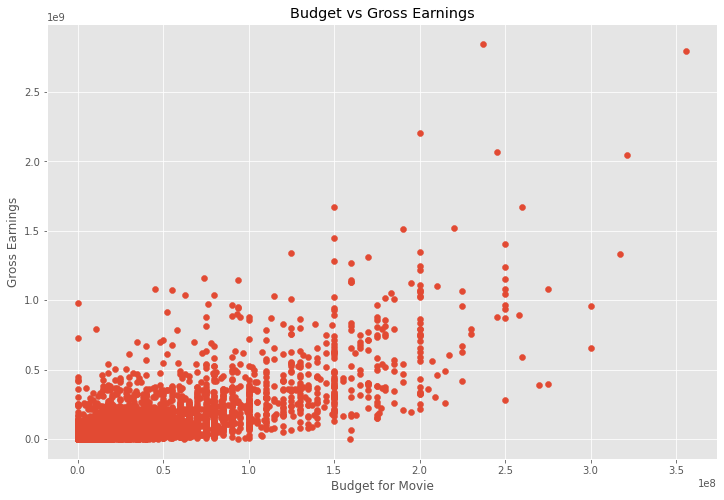

In [30]:
# Theory:
# 1. Budget and Gross have a high correlation
# 2. Company and Gross have a high correlation

# Scatter plot with budget vs gross:

plt.scatter(x = df["budget"], y = df["gross"])

plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget for Movie")
plt.ylabel("Gross Earnings")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

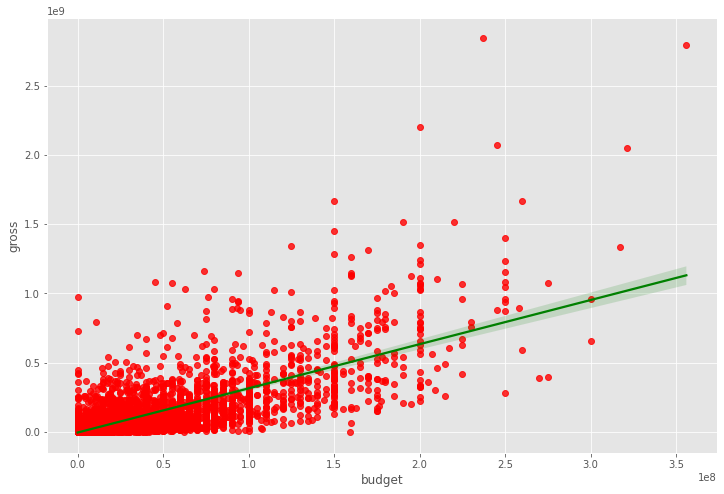

In [11]:
# Regression Plot for budget vs gross
# to see if there's a correlation

sns.regplot(x = "budget", y = "gross", data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "green"})

In [16]:
# Looking at correlation matrix

df.corr(method="pearson")

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [17]:
# Budget and Gross have a high correlation
# I was correct 

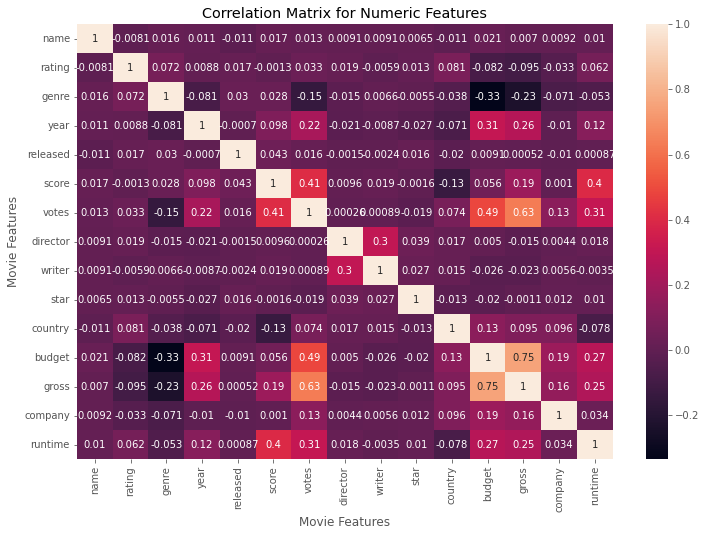

In [29]:
# Visualising the Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [20]:
# Looking at the second theory:
# Note - company is not a numerical feature

# We can create a unique numerical identifier for the comapnies
# by turning all the colums of object data type into numeric data types

df_numeric = df

for col in df_numeric.columns:
    if (df_numeric[col].dtype == "object"):
        df_numeric[col] = df_numeric[col].astype("category")
        df_numeric[col] = df_numeric[col].cat.codes

df_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,3395,4,4,1985,2966,6.4,701.0,828,3782,1045,25,0,0,1055,104.0
828,3823,6,4,1985,2977,5.3,128.0,2421,3511,2175,55,0,0,2193,83.0
829,5244,6,0,1985,3147,4.8,134.0,2562,3949,632,55,0,0,1528,90.0
830,4058,5,4,1985,993,5.1,351.0,582,4530,940,14,0,0,1230,97.0


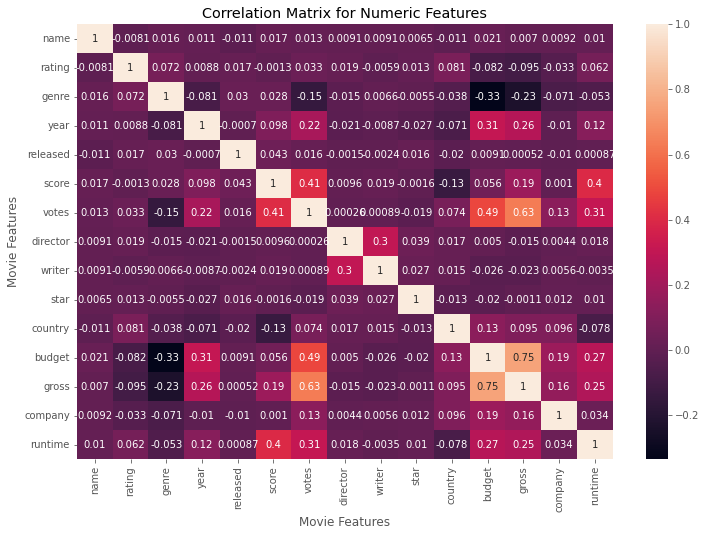

In [28]:
# Visualising the Correlation Matrix
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [26]:
# Via the correlation matrix view the features with the highest correlation
# via un-stack

correlation_matrix = df_numeric.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) >= 0.5]

high_corr

gross     votes       0.632834
votes     gross       0.632834
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# 2nd theory was incorrect - company and gross have a low correlation
# But, votes and gross have a high correlation